In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster import hierarchy as hr

In [43]:
covid = "https://raw.githubusercontent.com/ramadanzakbar/ahc-clustering/master/DAA_M06_COVID_data.csv"
df = pd.read_csv(covid)
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78254,ZWE,Africa,Zimbabwe,2021-03-25,36778.0,29.0,23.857,1518.0,2.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78255,ZWE,Africa,Zimbabwe,2021-03-26,36805.0,27.0,21.857,1518.0,0.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78256,ZWE,Africa,Zimbabwe,2021-03-27,36818.0,13.0,22.286,1519.0,1.0,1.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
78257,ZWE,Africa,Zimbabwe,2021-03-28,36822.0,4.0,22.429,1520.0,1.0,1.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [47]:
covid = df[df['date']=='2020-12-31']
covid2 = covid[['location','total_cases_per_million','new_cases_per_million',
                   'total_deaths_per_million','new_deaths_per_million',
                   'reproduction_rate','positive_rate','total_tests_per_thousand',
                 'icu_patients_per_million','hosp_patients_per_million']].dropna()
covid2

,location,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,reproduction_rate,positive_rate,total_tests_per_thousand,icu_patients_per_million,hosp_patients_per_million
4823,Austria,40062.067,323.437,690.842,8.105,0.96,0.108,426.021,43.969,216.069
7584,Belgium,55782.349,194.484,1684.957,7.507,0.90,0.072,600.934,42.624,188.703
11106,Bulgaria,29109.535,150.537,1090.316,8.779,0.76,0.175,165.439,67.209,695.263
13102,Canada,15484.250,189.258,417.623,2.968,1.09,0.065,475.995,21.170,110.937
18206,Cyprus,25138.743,0.000,135.860,0.000,1.16,0.037,1184.646,30.825,182.669
19410,Denmark,28333.952,389.144,224.094,7.251,0.84,0.032,1819.095,22.789,151.756
22887,Estonia,21100.020,553.320,172.630,2.262,1.04,0.137,481.249,32.415,293.998
25471,Finland,6516.664,44.940,101.250,0.902,0.92,0.022,452.206,4.873,35.916
34459,Ireland,18587.038,328.487,453.036,2.228,1.88,0.084,480.986,8.506,99.437
34929,Israel,48900.698,771.529,384.147,2.080,1.37,0.053,968.634,25.302,168.563


In [48]:
covid_data = covid2.drop(columns = 'location')
countries = covid2['location'].tolist()
countries

['Austria',
 'Belgium',
 'Bulgaria',
 'Canada',
 'Cyprus',
 'Denmark',
 'Estonia',
 'Finland',
 'Ireland',
 'Israel',
 'Italy',
 'Luxembourg',
 'Portugal',
 'Slovenia',
 'Spain',
 'United Kingdom',
 'United States']

<function matplotlib.pyplot.show>

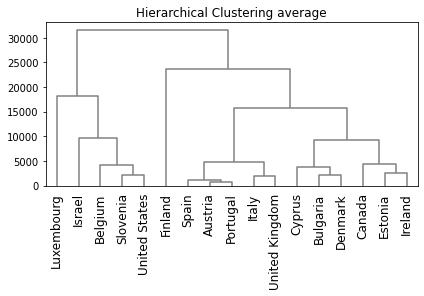

In [49]:
clusters = hr.linkage(covid_data,metric = 'euclidean',method = 'average')
# cut_height = 15000
# colour1 = 'red'
# colour2 = 'yellow'
# colour3 = 'green'
# colour4 = 'blue'
# hr.set_link_color_palette([colour1, colour2, colour3, colour4])
hr.dendrogram(
    clusters,
    labels = countries,
    leaf_rotation = 90,
    leaf_font_size = 12,
    color_threshold = 0,
    above_threshold_color = 'grey',)
plt.tight_layout()
plt.title("Hierarchical Clustering average")
plt.show

<function matplotlib.pyplot.show>

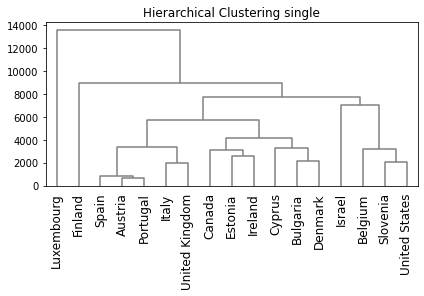

In [50]:
clusters = hr.linkage(covid_data,metric = 'euclidean',method = 'single')
hr.dendrogram(
    clusters,
    labels = countries,
    leaf_rotation = 90,
    leaf_font_size = 12,
    color_threshold = 0,
    above_threshold_color = 'grey',)
plt.tight_layout()
plt.title("Hierarchical Clustering single")
plt.show

<function matplotlib.pyplot.show>

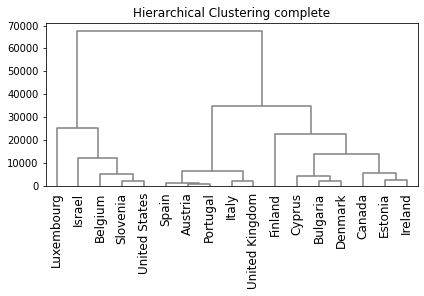

In [51]:
clusters = hr.linkage(covid_data,metric = 'euclidean',method = 'complete')
hr.dendrogram(
    clusters,
    labels = countries,
    leaf_rotation = 90,
    leaf_font_size = 12,
    color_threshold = 0,
    above_threshold_color = 'grey',)
plt.tight_layout()
plt.title("Hierarchical Clustering complete")
plt.show